In [280]:
# Import Dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import requests
import datetime
from citipy import citipy
from config import api_key

base_url = "http://api.openweathermap.org/data/2.5/weather"

params = {
    "q": "New York,US",
    "units": "IMPERIAL",
    "mode": "json",
    "APPID": api_key
}

In [281]:
samples = 50
lats = np.random.uniform(low=-90.000, high=90.000, size=samples) 
lngs = np.random.uniform(low=-180.000, high=180.000, size=samples)

lats = list(lats)
lngs = list(lngs)


In [282]:
cities = []
countries = []
timestamps = []
dates = []
max_temps = []
humidities = []
windspeeds = []
cloudiness = []

j = 0
while j < len(lats):
    print(lats[j], lngs[j])
    
    one_city = citipy.nearest_city(lats[j], lngs[j])
    city_name = one_city.city_name
    city_country_code = one_city.country_code
    
    print(f'Processing Record {j+1} of Set 1 | {city_name}')
    
    # Build OpenWeatherMap API query
    
    query = city_name + ',' + city_country_code
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    params = {
            "q": query,
            "units": "IMPERIAL",
            "mode": "json",
            "APPID": api_key
            }
    response = requests.get(base_url, params=params)
    city_weather = response.json()

    try:

        timestamps.append(city_weather['dt'])
        dates.append(datetime.datetime.fromtimestamp\
                     (int(city_weather['dt'])).strftime('%m-%d-%Y'))
        max_temps.append(city_weather['main']['temp'])
        humidities.append(city_weather['main']['humidity'])
        windspeeds.append(city_weather['wind']['speed'])
        cloudiness.append(city_weather['clouds']['all'])
        
        cities.append(one_city.city_name)
        countries.append(one_city.country_code)
        
        j += 1
    
    except KeyError:
        del lats[j]
        del lngs[j]
        print("Oops, that city doesn't exist in OpenWeatherMap.")

-77.6076545201 -41.5402981446
Processing Record 1 of Set 1 | ushuaia
-63.3820027049 75.0361721519
Processing Record 2 of Set 1 | saint-philippe
27.859994566 -174.07972793
Processing Record 3 of Set 1 | kapaa
23.1876229773 166.716379691
Processing Record 4 of Set 1 | butaritari
68.771654643 -18.6075624653
Processing Record 5 of Set 1 | dalvik
-57.9134133093 -148.17699285
Processing Record 6 of Set 1 | mataura
Oops, that city doesn't exist in OpenWeatherMap.
-25.9532199486 37.9556884256
Processing Record 6 of Set 1 | inhambane
35.876244431 158.699252542
Processing Record 7 of Set 1 | sentyabrskiy
Oops, that city doesn't exist in OpenWeatherMap.
40.4085101361 -82.8611552467
Processing Record 7 of Set 1 | delaware
35.2917340792 -46.5948447524
Processing Record 8 of Set 1 | torbay
61.8568238672 -102.568041557
Processing Record 9 of Set 1 | flin flon
50.6340206127 160.874738356
Processing Record 10 of Set 1 | petropavlovsk-kamchatskiy
-31.6387769465 -123.264732598
Processing Record 11 of Set

In [285]:
# Create and populate summary dataframe

summary_df = pd.DataFrame({'City':cities,
                           'Country':countries,
                           'Latitude':lats,
                           'Longitude':lngs,
                           'Timestamp':timestamps,
                           'Date':dates,
                           'Max Temperature':max_temps,
                           'Humidity':humidities,
                           'Windspeed':windspeeds,
                           'Cloudiness':cloudiness
                          })

summary_df.drop_duplicates()

# Configure dataframe column order and display
summary_df = summary_df[['City',
                         'Country',
                         'Latitude',
                         'Longitude',
                         'Timestamp',
                         'Date',
                         'Max Temperature',
                         'Humidity',
                         'Windspeed',
                         'Cloudiness']]

summary_df

,City,Country,Latitude,Longitude,Timestamp,Date,Max Temperature,Humidity,Windspeed,Cloudiness
0,ushuaia,ar,-77.607655,-41.540298,1511275778,11-21-2017,43.36,81,10.76,92
1,saint-philippe,re,-63.382003,75.036172,1511274600,11-21-2017,77.00,78,19.46,90
2,kapaa,us,27.859995,-174.079728,1511272560,11-21-2017,66.20,82,5.82,75
3,butaritari,ki,23.187623,166.716380,1511276314,11-21-2017,83.41,100,0.36,20
4,dalvik,is,68.771655,-18.607562,1511272800,11-21-2017,33.80,80,13.87,90
5,inhambane,mz,-25.953220,37.955688,1511276315,11-21-2017,79.77,74,11.77,0
6,delaware,us,40.408510,-82.861155,1511276040,11-21-2017,50.61,50,8.05,1
7,torbay,ca,35.291734,-46.594845,1511272800,11-21-2017,35.69,69,21.92,40
8,flin flon,ca,61.856824,-102.568042,1511272800,11-21-2017,5.00,84,6.93,40
9,petropavlovsk-kamchatskiy,ru,50.634021,160.874738,1511272800,11-21-2017,24.80,92,4.47,75


In [286]:
# Count number of records pulled

city_count = len(summary_df)

print(f'Number of cities: {city_count}')

Number of cities: 42


In [287]:
# Save the DataFrame as a csv

summary_df.to_csv("OpenWeatherMap-analysis.csv", encoding="utf-8", index=False)

# Latitude vs. Temperature Plot

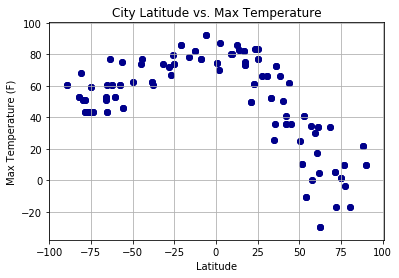

In [289]:
# Create scatterplots

plt.scatter(summary_df['Latitude'], 
            summary_df['Max Temperature'], color='darkblue')

# Set textual properties

plt.title(f'City Latitude vs. Max Temperature')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.show()

# Latitude vs. Humidity Plot

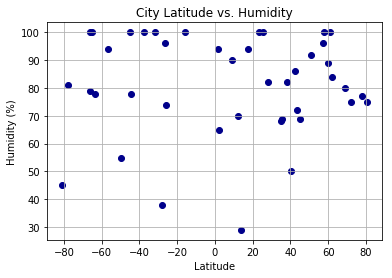

In [290]:
# Create scatterplots

plt.scatter(summary_df['Latitude'], 
            summary_df['Humidity'], color='darkblue')

# Set textual properties

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.show()

# Latitude vs. Cloudiness Plot

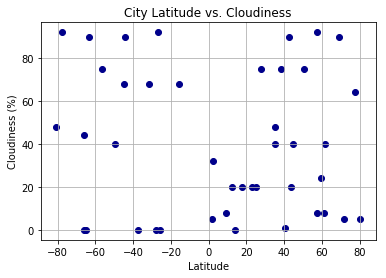

In [291]:
# Create scatterplots

plt.scatter(summary_df['Latitude'], 
            summary_df['Cloudiness'], color='darkblue')

# Set textual properties

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.show()

# Latitude vs. Windspeed Plot

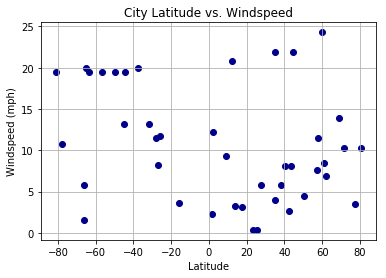

In [292]:
# Create scatterplots

plt.scatter(summary_df['Latitude'], 
            summary_df['Windspeed'], color='darkblue')

# Set textual properties

plt.title("City Latitude vs. Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.grid(True)

plt.show()